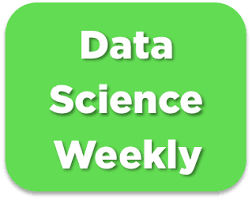

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

In [1]:
!pip install plotly==4.9.0

In [2]:
# import des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "notebook" # to be replaced by "iframe" if working on JULIE
from IPython.display import display


In [5]:
# lecture données train
data = pd.read_csv("conversion_data_train.csv")

In [6]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [7]:
data.shape

(284580, 6)

In [8]:
data.describe()

,age,new_user,total_pages_visited,converted
count,284580.000000,284580.000000,284580.000000,284580.000000
mean,30.564203,0.685452,4.873252,0.032258
std,8.266789,0.464336,3.341995,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [13]:
# visites par catégorie (pays, age...)
for c in data.columns : 
    nbr = data[c].value_counts()
    print(c)
    print("--") 
    print(nbr,"--")

country
--
US         160124
China       69122
UK          43641
Germany     11693
Name: country, dtype: int64 --
age
--
28     12972
30     12956
29     12710
27     12668
26     12525
31     12327
25     12157
32     12111
24     11647
33     11392
23     11097
34     10911
22     10471
35     10352
21      9870
36      9668
20      9131
37      8773
19      8452
38      8067
18      7662
39      7343
17      6825
40      6451
41      5783
42      5029
43      4423
44      3808
45      3249
46      2693
47      2255
48      1898
49      1467
50      1213
51       990
52       835
53       571
54       459
55       352
56       251
57       211
58       147
59       115
60        86
61        63
62        50
63        29
64        26
65        14
66         9
67         5
68         2
70         2
111        1
72         1
69         1
73         1
79         1
123        1
77         1
Name: age, dtype: int64 --
new_user
--
1    195066
0     89514
Name: new_user, dtype: int64 --
sour

In [15]:
# échantillon de données
data_sample = data.sample(500)

In [16]:
# Correlation matrix
corr_matrix = data_sample.corr()

fig = go.Figure(
    data = go.Heatmap(
        x = corr_matrix.columns,
        y = corr_matrix.index,
        z = corr_matrix),
    layout = go.Layout(
        title = go.layout.Title(text = "Correlation heatmap", x = 0.5)
    )
)
fig.show(renderer='iframe')

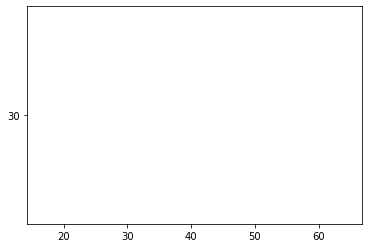

In [17]:
plt.bar(data_sample["age"], height = "30")
plt.show("iframe")

(array([1.12505e+05, 1.22239e+05, 4.29320e+04, 6.61100e+03, 2.85000e+02,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 17. ,  27.6,  38.2,  48.8,  59.4,  70. ,  80.6,  91.2, 101.8,
        112.4, 123. ]),
 <BarContainer object of 10 artists>)

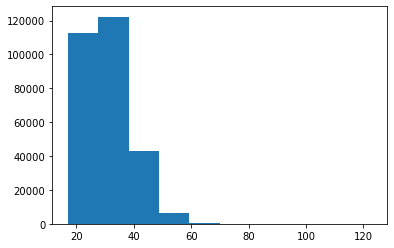

In [19]:
# historgramme des ages
plt.hist(data["age"])

In [13]:
data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

(array([1.15648e+05, 9.67700e+04, 4.78520e+04, 1.53910e+04, 3.80200e+03,
        2.96000e+03, 1.53100e+03, 5.27000e+02, 8.90000e+01, 1.00000e+01]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

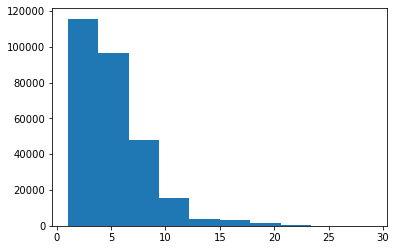

In [21]:
# historgramme des pages visitées
plt.hist(data["total_pages_visited"])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='country', ylabel='age'>

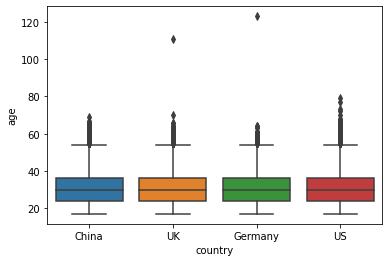

In [22]:
sns.boxplot(data["country"],data["age"] )

In [23]:
df_country = data.groupby("country").converted.count()
df_country.head()

country
China       69122
Germany     11693
UK          43641
US         160124
Name: converted, dtype: int64

In [17]:
df_txcon = data.groupby("country").converted.sum()*100/df_country
df_txcon.head()

country
China      0.128758
Germany    6.243051
UK         5.249651
US         3.790812
Name: converted, dtype: float64

In [18]:
df_txcon.head()

country
China      0.128758
Germany    6.243051
UK         5.249651
US         3.790812
Name: converted, dtype: float64

In [19]:
df_nonconverted = data[data["converted"]==0].groupby("country").converted.count()

In [20]:
df_nonconverted.head()

country
China       69033
Germany     10963
UK          41350
US         154054
Name: converted, dtype: int64

In [21]:
df_converted = data[data["converted"]==1].groupby("country").converted.sum()

In [22]:
df_age = data[data["converted"]==1].groupby("country").age.mean()

In [23]:
df_converted.head()

country
China        89
Germany     730
UK         2291
US         6070
Name: converted, dtype: int64

In [24]:
df_age.head()

country
China      25.573034
Germany    26.506849
UK         26.477084
US         26.623723
Name: age, dtype: float64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='country'>

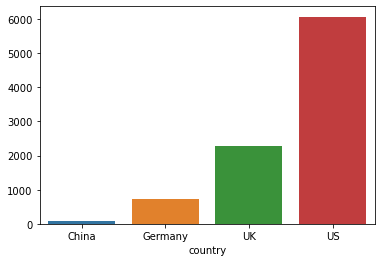

In [25]:
sns.barplot(df_converted.index, df_converted.values)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='country'>

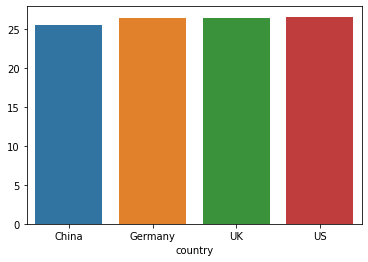

In [26]:
sns.barplot(df_age.index, df_age.values)

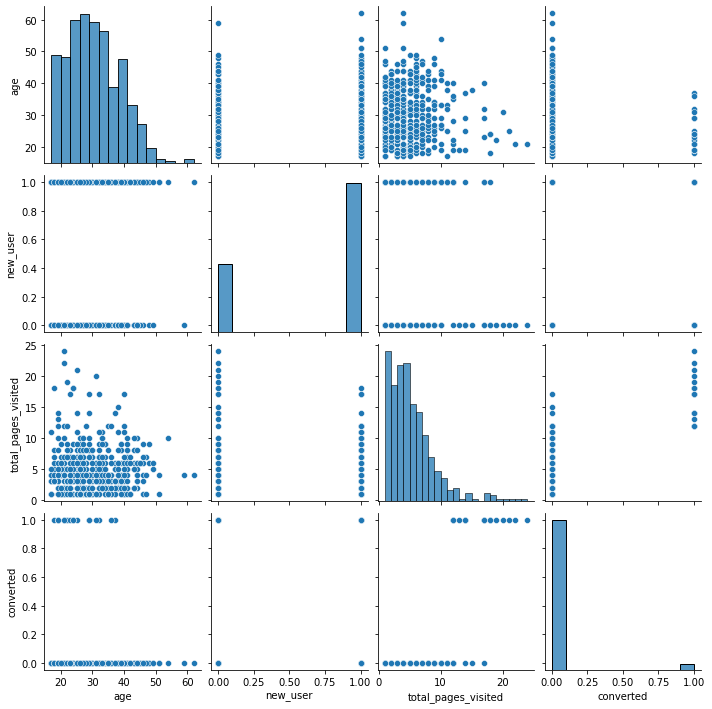

In [27]:
sns.pairplot(data_sample)

In [24]:
# Barplot of each qualitative variable
cat_features = ['country', 'new_user', 'source', 'converted']

In [25]:
# Barplots for categorical features
for f in cat_features:
    fig = px.histogram(data, x = f, color = 'converted', barmode = 'group')
    fig.update_layout(
        title = go.layout.Title(text = "Influence of " + f, x = 0.5), autosize=False, height=400)
    fig.show(renderer='iframe')

In [26]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['country','age', 'new_user', 'source', 'total_pages_visited']
target_variable = "converted"

X = data.loc[:,features_list]
Y = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [27]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [28]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [29]:
X_train

array([['China', 23, 0, 'Direct', 4],
       ['US', 25, 1, 'Direct', 8],
       ['US', 32, 1, 'Seo', 2],
       ...,
       ['UK', 31, 1, 'Direct', 6],
       ['UK', 25, 1, 'Seo', 5],
       ['US', 34, 1, 'Ads', 3]], dtype=object)

In [30]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

### Training pipeline

In [31]:
# Create pipeline for numeric features
numeric_features = [1, 4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [0, 2, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [32]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! 
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[['China' 23 0 'Direct' 4]
 ['US' 25 1 'Direct' 8]
 ['US' 32 1 'Seo' 2]
 ['US' 37 1 'Seo' 3]
 ['UK' 24 1 'Direct' 4]]
...Done.
[[-0.91516278 -0.26070136  0.          0.          0.          0.
   1.          0.        ]
 [-0.67320988  0.93728655  0.          0.          1.          1.
   1.          0.        ]
 [ 0.17362526 -0.85969532  0.          0.          1.          1.
   0.          1.        ]
 [ 0.7785075  -0.56019834  0.          0.          1.          1.
   0.          1.        ]
 [-0.79418633 -0.26070136  0.          1.          0.          1.
   1.          0.        ]]

Performing preprocessings on test set...
[['US' 20 1 'Ads' 7]
 ['US' 31 1 'Seo' 5]
 ['US' 28 0 'Seo' 4]
 ['Germany' 25 1 'Ads' 4]
 ['US' 44 0 'Ads' 7]]
...Done.
[[-1.27809213  0.63778957  0.          0.          1.          1.
   0.          0.        ]
 [ 0.05264881  0.03879562  0.          0.          1.          1.
   0.          1.        ]
 [-0.31028053 -0.

In [33]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [34]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [35]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [36]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve

In [37]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.986315115452792
accuracy on test set :  0.9853468269028042

f1-score on training set :  0.7639889569725944
f1-score on test set :  0.7562828755113967



In [38]:
data["converted"].value_counts()/data.shape[0]

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [39]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246944    955]
 [  2550   5673]]

Confusion matrix on test set : 
[[27394   107]
 [  310   647]]



<AxesSubplot:>

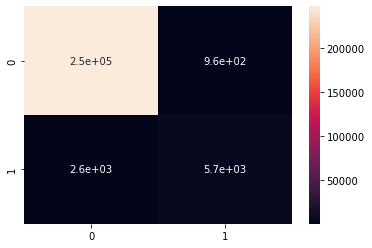

In [40]:
sns.heatmap(confusion_matrix(Y_train, Y_train_pred), annot=True)

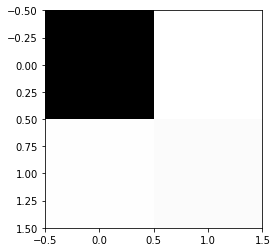

In [41]:
plt.imshow(confusion_matrix(Y_train, Y_train_pred), cmap='binary')

In [42]:
# Visualize ROC curves
probas_train = classifier.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = roc_curve(Y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = recalls, 
        y = precisions, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = classifier.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(Y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show('iframe')

## Random Forest

In [43]:
# Train model
print("Train model...")
rf = RandomForestClassifier() 
parameters = {
    'n_estimators' : [50],
    'max_depth': [8],
    'min_samples_leaf': [3, 10]
}
classifier = GridSearchCV(rf, parameters, scoring = 'f1')
classifier.fit(X_train, Y_train)
classifier = classifier.best_estimator_
print("...Done.")

Train model...
...Done.


In [44]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [45]:
# Predictions on training set
print("Predictions on training set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [46]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9864127251856537
accuracy on test set :  0.9852414083913135

f1-score on training set :  0.7627488410144533
f1-score on test set :  0.753810082063306



In [47]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[247048    851]
 [  2629   5594]]

Confusion matrix on test set : 
[[27395   106]
 [  314   643]]



In [48]:
# Visualize ROC curves
probas_train = classifier.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = roc_curve(Y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = recalls, 
        y = precisions, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = classifier.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(Y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show('iframe')

### Régulariation (pas necessaire dans notre cas car pas de Overfitting ni d'underfitting)

In [49]:
# Train model
print("Train model...")
classifier = LogisticRegression(penalty='l2'
)
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [50]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [51]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [52]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.986315115452792
accuracy on test set :  0.9853468269028042

f1-score on training set :  0.7639889569725944
f1-score on test set :  0.7562828755113967



## Test sur le data test 

In [57]:
df_test = pd.read_csv("conversion_data_test.csv")

In [58]:
df_test.head()

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [59]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['country','age', 'new_user', 'source', 'total_pages_visited']


X = df_test.loc[:,features_list]


print("...Done.")
print()

print()
print('X :')
print(X.head())

Separating labels from features...
...Done.


X :
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [ ]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
X = preprocessor.transform(X) # Don't fit again !! 
print('...Done.')
print()

In [61]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1 0 0 ... 0 1 0]



In [70]:
df_test["prédiction"] = Y_test_pred

In [71]:
df_test.head()

,country,age,new_user,source,total_pages_visited,prédiction,prédiction_name
0,UK,28,0,Seo,16,1,Not converted
1,UK,22,1,Direct,5,0,Not converted
2,China,32,1,Seo,1,0,Not converted
3,US,32,1,Ads,6,0,Not converted
4,China,25,0,Seo,3,0,Not converted


In [72]:
def convert(x):
    if x == 1 :
        return "Converted"
    else : 
        return "Not converted"

In [73]:
df_test["prédiction_name"] = df_test["prédiction"].apply(lambda x : convert(x))

In [74]:
df_test.head()

,country,age,new_user,source,total_pages_visited,prédiction,prédiction_name
0,UK,28,0,Seo,16,1,Converted
1,UK,22,1,Direct,5,0,Not converted
2,China,32,1,Seo,1,0,Not converted
3,US,32,1,Ads,6,0,Not converted
4,China,25,0,Seo,3,0,Not converted


In [75]:
importance = classifier.coef_

In [76]:
print(importance)

[[-0.6068883   2.5220074   3.61604001  3.45948141  3.11495652 -1.75255697
  -0.21987298 -0.00420022]]


In [77]:
print(X_train[0])

[-0.91516278 -0.26070136  0.          0.          0.          0.
  1.          0.        ]


### Cross validation du modèle

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, Y_train, cv=5)

In [79]:
print(scores)

[0.98658858 0.98680332 0.98559269 0.98625644 0.98641262]


In [80]:
print(scores.mean(),scores.std())

0.9863307301581349 0.0004115222348482242
